In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import numpy as np

import datetime as dt

In [2]:
df = pd.read_csv("Resources/percent_all.csv")

df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.181818
1,8844,1995-12-15,0.000000
2,15602,1995-12-22,0.000000
3,31357,1995-12-22,0.333333
4,11862,1995-02-10,0.500000
...,...,...,...
30672,390959,2000-10-22,0.250000
30673,289923,2000-10-03,0.000000
30674,222848,1995-01-01,0.000000
30675,30840,1991-05-13,0.500000


In [3]:
# sort data by release_date
df=df.sort_values("release_date")

df

,movie_id,release_date,percent_female
17904,43387,1950-01-01,0.000000
18314,109364,1950-01-01,0.000000
14064,83015,1950-01-01,0.000000
20273,43395,1950-01-01,0.000000
2195,43391,1950-01-04,0.000000
...,...,...,...
27614,374471,2017-09-14,0.333333
26877,300665,2017-09-14,0.111111
30312,439502,2017-09-22,0.000000
28941,398818,2017-10-27,0.125000


In [4]:
# change release_date column from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [5]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [6]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
df['year_month'] = pd.to_datetime(df['release_date']).dt.strftime('%Y-%m')

In [7]:
df

,movie_id,release_date,percent_female,year_month
17904,43387,1950-01-01,0.000000,1950-01
18314,109364,1950-01-01,0.000000,1950-01
14064,83015,1950-01-01,0.000000,1950-01
20273,43395,1950-01-01,0.000000,1950-01
2195,43391,1950-01-04,0.000000,1950-01
...,...,...,...,...
27614,374471,2017-09-14,0.333333,2017-09
26877,300665,2017-09-14,0.111111,2017-09
30312,439502,2017-09-22,0.000000,2017-09
28941,398818,2017-10-27,0.125000,2017-10


In [8]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                object
dtype: object

In [9]:
# convert year_month column to datetime format
df['year_month'] = pd.to_datetime(df['year_month'])

In [10]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [11]:
# convert year_month to ordinal for ML
df['year_month']=df['year_month'].map(dt.datetime.toordinal)

In [12]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [13]:
# group by year and average female_percent for all movies that year
count_df = df.groupby(['year_month'])['percent_female'].mean()

In [14]:
count_df

year_month
711858    0.019608
711889    0.028205
711917    0.017857
711948    0.000000
711978    0.055556
            ...   
736511    0.221830
736542    0.280525
736573    0.111111
736603    0.125000
736664    0.200000
Name: percent_female, Length: 815, dtype: float64

In [15]:
# turn series to dataframe 
dataframe = count_df.to_frame()

DONT RERUN

In [16]:
# change year from axis to column 
dataframe = dataframe.rename_axis('year_month').reset_index()

In [17]:
dataframe

,year_month,percent_female
0,711858,0.019608
1,711889,0.028205
2,711917,0.017857
3,711948,0.000000
4,711978,0.055556
...,...,...
810,736511,0.221830
811,736542,0.280525
812,736573,0.111111
813,736603,0.125000


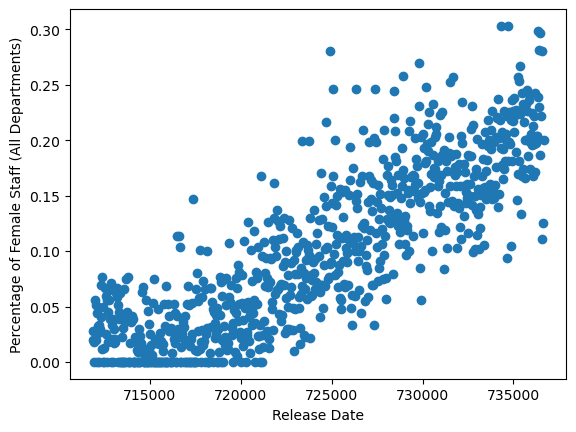

In [18]:
plt.scatter(dataframe.year_month, dataframe.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Departments)')
plt.show()

In [19]:
X = dataframe.year_month.values.reshape(-1, 1)


In [20]:
X

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [21]:
X.shape

(815, 1)

In [22]:
y = dataframe.percent_female

y

0      0.019608
1      0.028205
2      0.017857
3      0.000000
4      0.055556
         ...   
810    0.221830
811    0.280525
812    0.111111
813    0.125000
814    0.200000
Name: percent_female, Length: 815, dtype: float64

In [23]:
model = LinearRegression()

In [24]:
model.fit(X, y)

LinearRegression()

In [25]:
y_pred = model.predict(X)
print(y_pred.shape)

(815,)


In [26]:
type(y)

pandas.core.series.Series

In [27]:
type(X)

numpy.ndarray

In [28]:
# turn X from numpy array to Series
date_transform = pd.Series(list(X))

In [29]:
date_transform

0      [711858]
1      [711889]
2      [711917]
3      [711948]
4      [711978]
         ...   
810    [736511]
811    [736542]
812    [736573]
813    [736603]
814    [736664]
Length: 815, dtype: object

In [30]:
type(date_transform)

pandas.core.series.Series

In [31]:
# turn date_transform from ordinal to timestamp
# https://stackoverflow.com/questions/55224227/convert-a-column-of-dates-from-ordinal-numbers-to-the-standard-date-format-pan
date_transform = date_transform.apply(dt.datetime.fromordinal)

In [32]:
date_transform

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
810   2017-07-01
811   2017-08-01
812   2017-09-01
813   2017-10-01
814   2017-12-01
Length: 815, dtype: datetime64[ns]

In [33]:
type(date_transform)

pandas.core.series.Series

In [34]:
# Use Pandas.to_datetime() and datetime.strftime() method to change to year_month format
date_transform = pd.to_datetime(date_transform).dt.strftime('%Y-%m')

In [35]:
date_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
810    2017-07
811    2017-08
812    2017-09
813    2017-10
814    2017-12
Length: 815, dtype: object

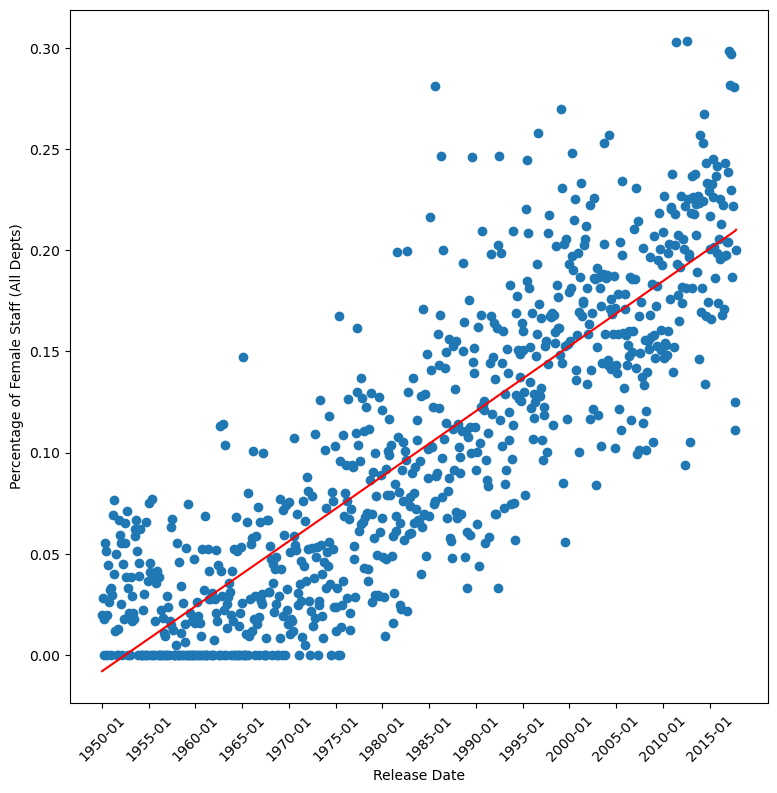

In [36]:
plt.figure(figsize=(9,9))

plt.scatter(date_transform, y)
plt.plot(date_transform, y_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Depts)')


# https://stackabuse.com/change-tick-frequency-in-matplotlib/
plt.xticks(np.arange(0, len(date_transform)+1, 60),rotation=45)

plt.show()

In [37]:
# GRAPH IF YOU DON'T CONVERT X AXIS FROM ORDINAL TO DATETIME

# plt.figure(figsize=(6,3))

# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.xlabel('Release Date')
# plt.ylabel('Percentage of Female Staff (All Depts)')

# plt.show()

In [38]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [8.79195459e-06]
y-axis intercept:  -6.266580642277931


In [41]:
dataframe.corr()

,year_month,percent_female
year_month,1.000000,0.847591
percent_female,0.847591,1.000000


Our linear model now looks like this:
𝑦= -6.266580642277931 + 8.79195459e-06𝑥
 
percent_female = -6.266580642277931 + 8.79195459e-06*year_month
 
or
 
x = (y + 6.266580642277931)/8.79195459e-06
 
year_month = (percent_female + 6.266580642277931)/8.79195459e-06


Additionally, the correlation between year_month and percent female is 0.84, since its a value above 0.8 it can be considered a strong positive correlation

## When would we obtain 50% female participation based on this model?

In [48]:
def calc_year_month(slope, intercept, y_value):
    return (y_value- intercept)/slope

year_month_fiftypercent = calc_year_month(model.coef_,model.intercept_, 0.5)
print(year_month_fiftypercent)

[769633.25661306]


Accuracy calculation

In [49]:
predictions = model.predict(X)
predictions

array([-7.95743251e-03, -7.68488191e-03, -7.43870719e-03, -7.16615659e-03,
       -6.90239796e-03, -6.62984736e-03, -6.36608873e-03, -6.09353813e-03,
       -5.82098754e-03, -5.55722890e-03, -5.28467831e-03, -5.02091967e-03,
       -4.74836908e-03, -4.47581849e-03, -4.22964376e-03, -3.95709317e-03,
       -3.69333453e-03, -3.42078394e-03, -3.15702530e-03, -2.88447471e-03,
       -2.61192412e-03, -2.34816548e-03, -2.07561489e-03, -1.81185625e-03,
       -1.53930566e-03, -1.26675506e-03, -1.01178838e-03, -7.39237789e-04,
       -4.75479151e-04, -2.02928559e-04,  6.08300789e-05,  3.33380671e-04,
        6.05931263e-04,  8.69689901e-04,  1.14224049e-03,  1.40599913e-03,
        1.67854972e-03,  1.95110032e-03,  2.19727504e-03,  2.46982564e-03,
        2.73358427e-03,  3.00613487e-03,  3.26989350e-03,  3.54244410e-03,
        3.81499469e-03,  4.07875333e-03,  4.35130392e-03,  4.61506256e-03,
        4.88761315e-03,  5.16016374e-03,  5.40633847e-03,  5.67888906e-03,
        5.94264770e-03,  

In [50]:
y

0      0.019608
1      0.028205
2      0.017857
3      0.000000
4      0.055556
         ...   
810    0.221830
811    0.280525
812    0.111111
813    0.125000
814    0.200000
Name: percent_female, Length: 815, dtype: float64

In [51]:
# error delte prediction vs actual data
predictions - y

0     -0.027565
1     -0.035890
2     -0.025296
3     -0.007166
4     -0.062458
         ...   
810   -0.013039
811   -0.071462
812    0.098225
813    0.084599
814    0.010136
Name: percent_female, Length: 815, dtype: float64

In [58]:
error_df = pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

In [59]:
error_df

,Predicted,Actual,Error
0,-0.007957,0.019608,-0.027565
1,-0.007685,0.028205,-0.035890
2,-0.007439,0.017857,-0.025296
3,-0.007166,0.000000,-0.007166
4,-0.006902,0.055556,-0.062458
...,...,...,...
810,0.208791,0.221830,-0.013039
811,0.209063,0.280525,-0.071462
812,0.209336,0.111111,0.098225
813,0.209599,0.125000,0.084599


In [61]:
error_df.describe()

,Predicted,Actual,Error
count,815.000000,815.000000,8.150000e+02
mean,0.100951,0.100951,-1.542733e-17
std,0.062999,0.074327,3.944156e-02
min,-0.007957,0.000000,-1.743770e-01
25%,0.046496,0.033333,-2.545766e-02
50%,0.100949,0.093000,3.740500e-03
75%,0.155415,0.160310,2.683175e-02
max,0.210136,0.303225,9.847084e-02


Error mean is -1.542733e-17 a considerably small number for the dataset evaluated

In [53]:
x_min = X.min()
x_max = X.max()

In [54]:
y_min_actual = y.min()
y_max_actual = y.max()

In [55]:
y_min = model.intercept_ + (model.coef_ * x_min)
y_max = model.intercept_ + (model.coef_ * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.0
Calculated Min Value: [-0.00795743]
Actual Max Value: 0.3032249496535211
Calculated Max Value: [0.21013579]


In [56]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0.0
Predicted Min Value: [-0.00795743]
Actual Max Value: 0.3032249496535211
Predicted Max Value: [0.21013579]


Residuals graph

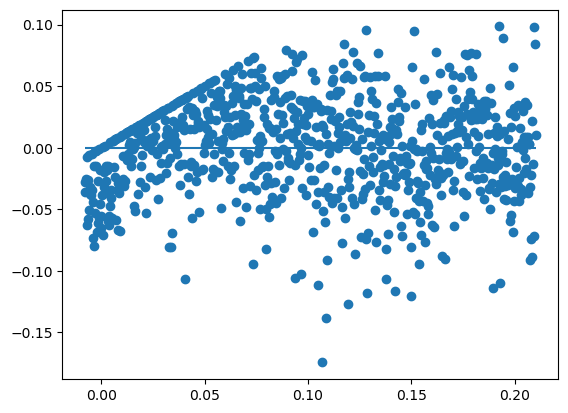

In [62]:
# Residuals
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()